<a href="https://colab.research.google.com/github/mlin3happy/ML-Learning/blob/main/Titanic_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm

# **Decision Tree with Pruning**

In [ ]:
#  Decision Tree with pruning
# source code:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv", delimiter=",")
df.head()
df=df.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]
df.describe(include="all").loc['std']



Survived     0.486592
Pclass       0.836071
Sex               NaN
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
Name: std, dtype: object

(535, 6)
(179, 6)


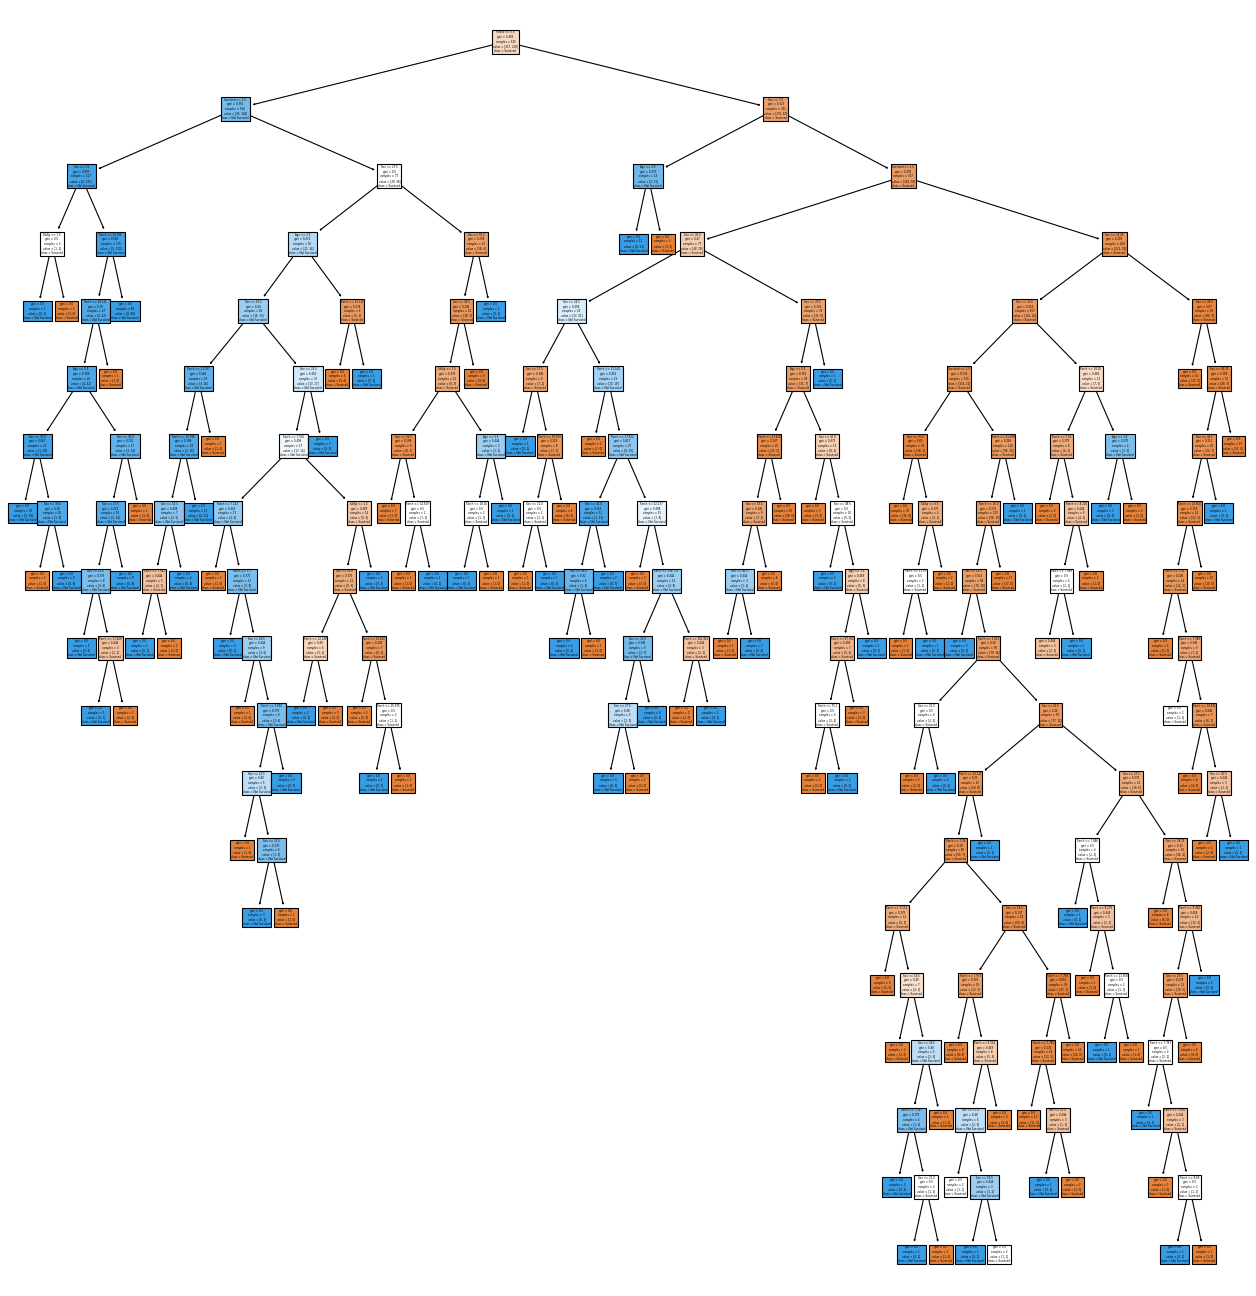

Train score 0.9925233644859813
Test score 0.7374301675977654
Cross Validation Score 0.763370432384517


In [ ]:
import matplotlib
matplotlib.style.use('classic')
df.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)
X=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
_tree=tree.DecisionTreeClassifier(random_state=42)
_tree.fit(x_train,y_train)
y_train_prediction=_tree.predict(x_train)
y_test_prediction=_tree.predict(x_test)
plt.figure(figsize=(20,20), facecolor='white', edgecolor=None)
features=df.columns
classes=['Survived','Not Survived']
tree.plot_tree(_tree, feature_names=features, class_names=classes, filled=True)
plt.show()

print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(_tree,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')







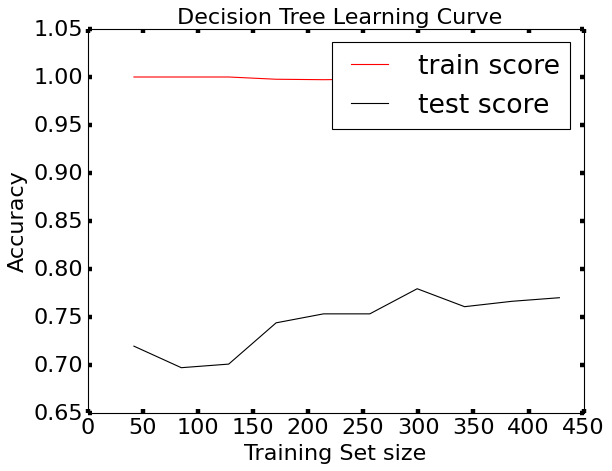

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(_tree, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure(facecolor='white')
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Learning Curve",fontsize=20)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.ylim(0.65,1.05)
plt.tick_params(labelsize=20,width=4)



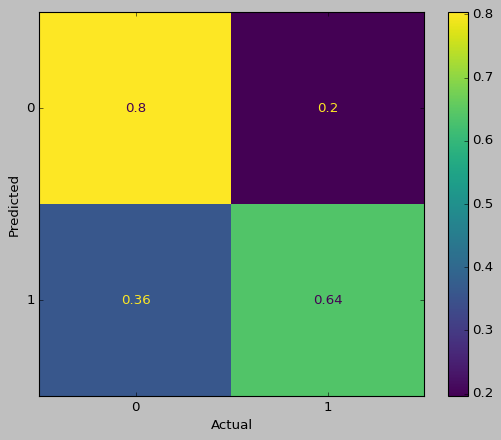

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       107
           1       0.69      0.64      0.66        72

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.74       179



In [ ]:
predictions=_tree.predict(x_test)
cm=confusion_matrix(y_test,predictions, labels=_tree.classes_, normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=_tree.classes_)
disp.plot()
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show(block=False)
print(classification_report(y_test,predictions))

<Figure size 640x480 with 0 Axes>

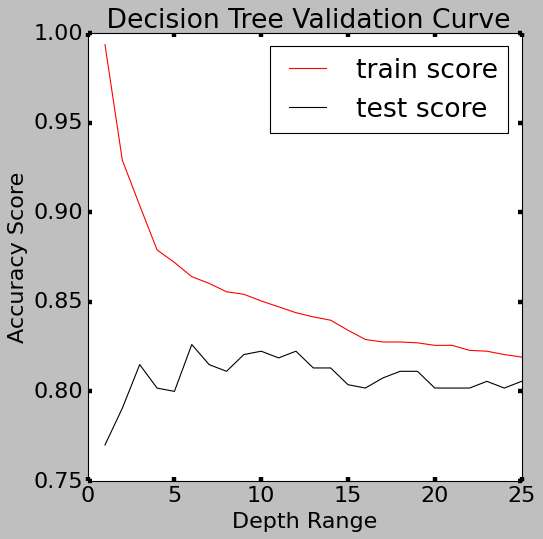

In [ ]:

#source code
#https://scikit-learn.org/stable/modules/learning_curve.html
depth_range=np.arange(25)+1
train_score, valid_score=validation_curve(_tree, x_train, y_train, param_name="min_samples_leaf", param_range=depth_range, cv=5, n_jobs=4, scoring='accuracy')
plt.figure(facecolor='white',edgecolor=None)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.subplots(1,figsize=(7,7))
plt.plot(depth_range, train_score_mean, label="train score", color="red")
plt.plot(depth_range, test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Validation Curve",fontsize=24)
plt.xlabel("Depth Range",fontsize=20)
plt.ylabel("Accuracy Score",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()




best estimator DecisionTreeClassifier(max_depth=4)
Train score 0.8523364485981308
Test score 0.7653631284916201
Cross Validation Score 0.792790308283266


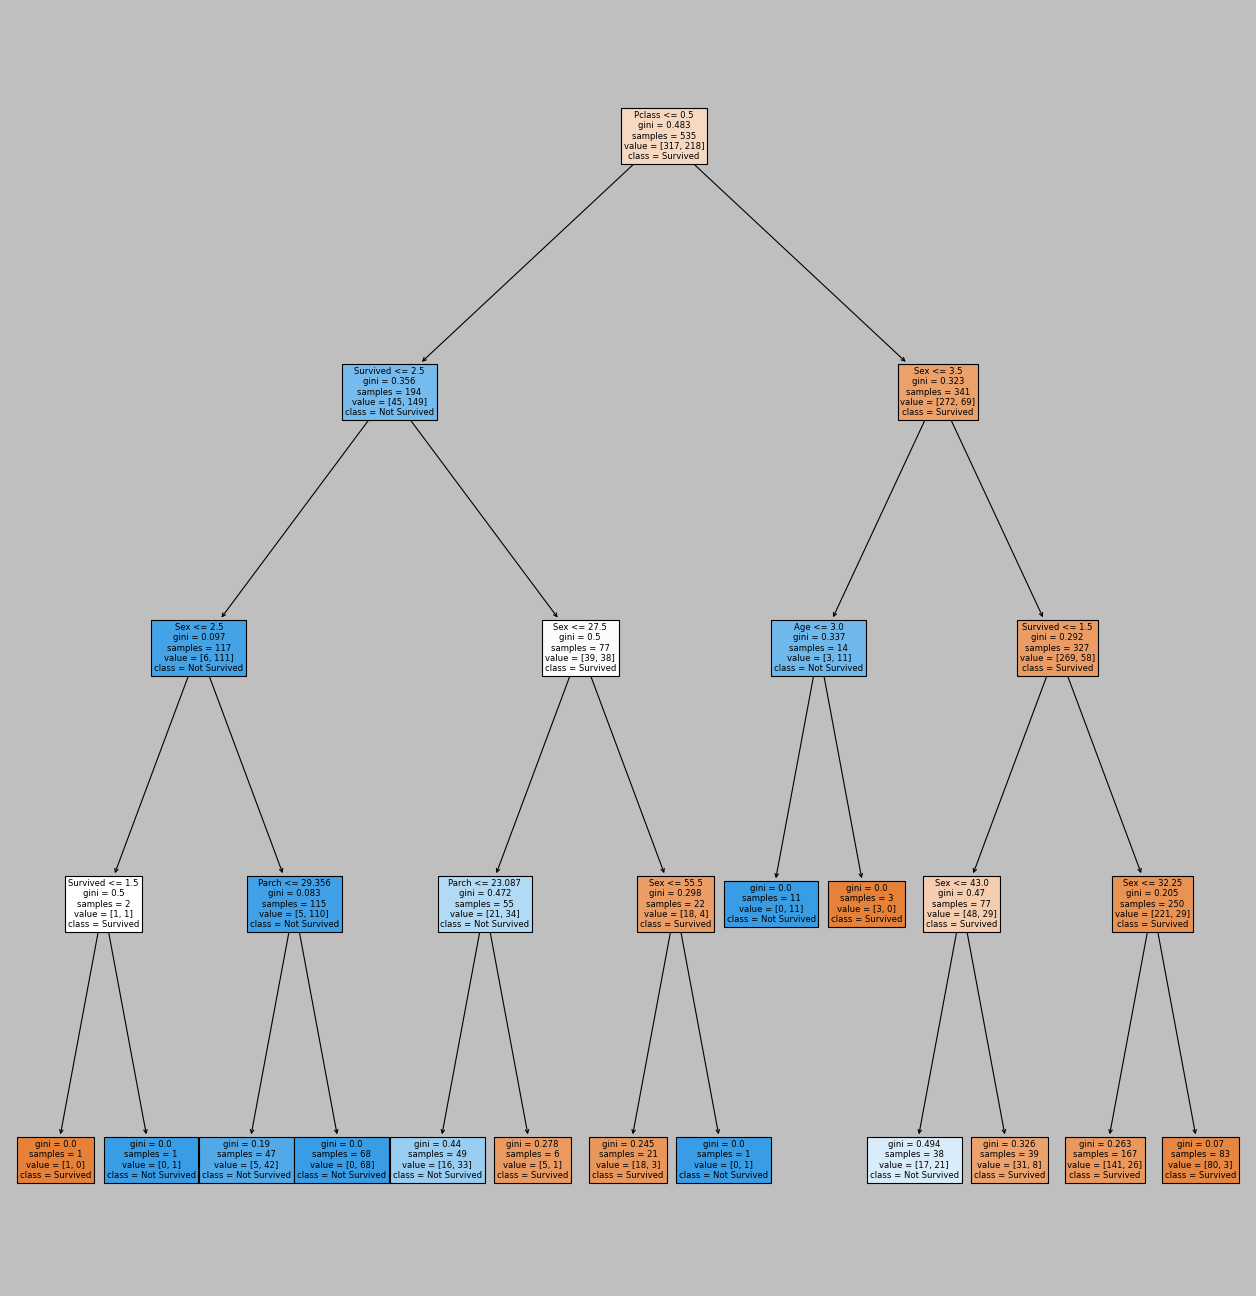

In [ ]:
from joblib import dump,load
params={'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40],
        'min_samples_split':[2,3,4],
        'min_samples_leaf':[1,2]}
_tree=tree.DecisionTreeClassifier()
gcv=GridSearchCV(estimator=_tree, param_grid=params,refit=True)
gcv.fit(x_train, y_train)
model=gcv.best_estimator_
dump(model,"model.joblib")
estimator=load("model.joblib")
print("best estimator",estimator)
model.fit(x_train,y_train)
y_train_prediction=model.predict(x_train)
y_test_prediction=model.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(model,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
plt.figure(figsize=(20,20))
features=df.columns
classes=['Survived','Not Survived']
tree.plot_tree(model, feature_names=features, class_names=classes, filled=True)
plt.show()


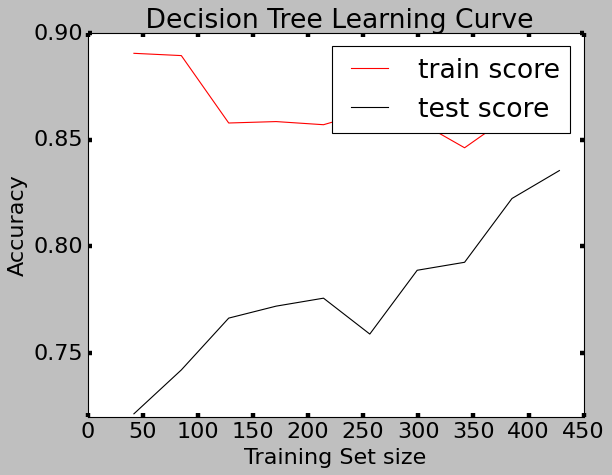

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(model, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

best alpha for testing data 0.011185823522272119


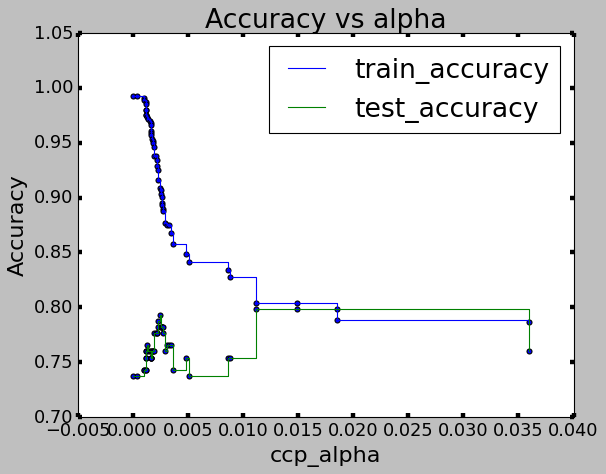

In [ ]:

path=_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# print(ccp_alphas)
scores=[]
_tree_list=[]
for ccp_alpha in ccp_alphas:
  _tree=tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
  _tree.fit(x_train, y_train)
  _tree_list.append(_tree)
_tree_list=_tree_list[:-1]
ccp_alphas=ccp_alphas[:-1]

train_acc=[]
test_acc=[]
for c in _tree_list:
  y_train_prediction=c.predict(x_train)
  y_test_prediction=c.predict(x_test)
  train_acc.append(accuracy_score(y_train_prediction, y_train))
  test_acc.append(accuracy_score(y_test_prediction, y_test))
best_test_index=np.argmax(test_acc)
best_test_alpha=ccp_alphas[best_test_index]
print("best alpha for testing data",best_test_alpha)
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle='steps-post')
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle='steps-post')
plt.legend(fontsize=24)
plt.title('Accuracy vs alpha',fontsize=24)
plt.xlabel("ccp_alpha",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=16,width=4)
plt.show()



Train score 0.8037383177570093
Test score 0.7988826815642458
Cross Validation Score 0.8025805180734759


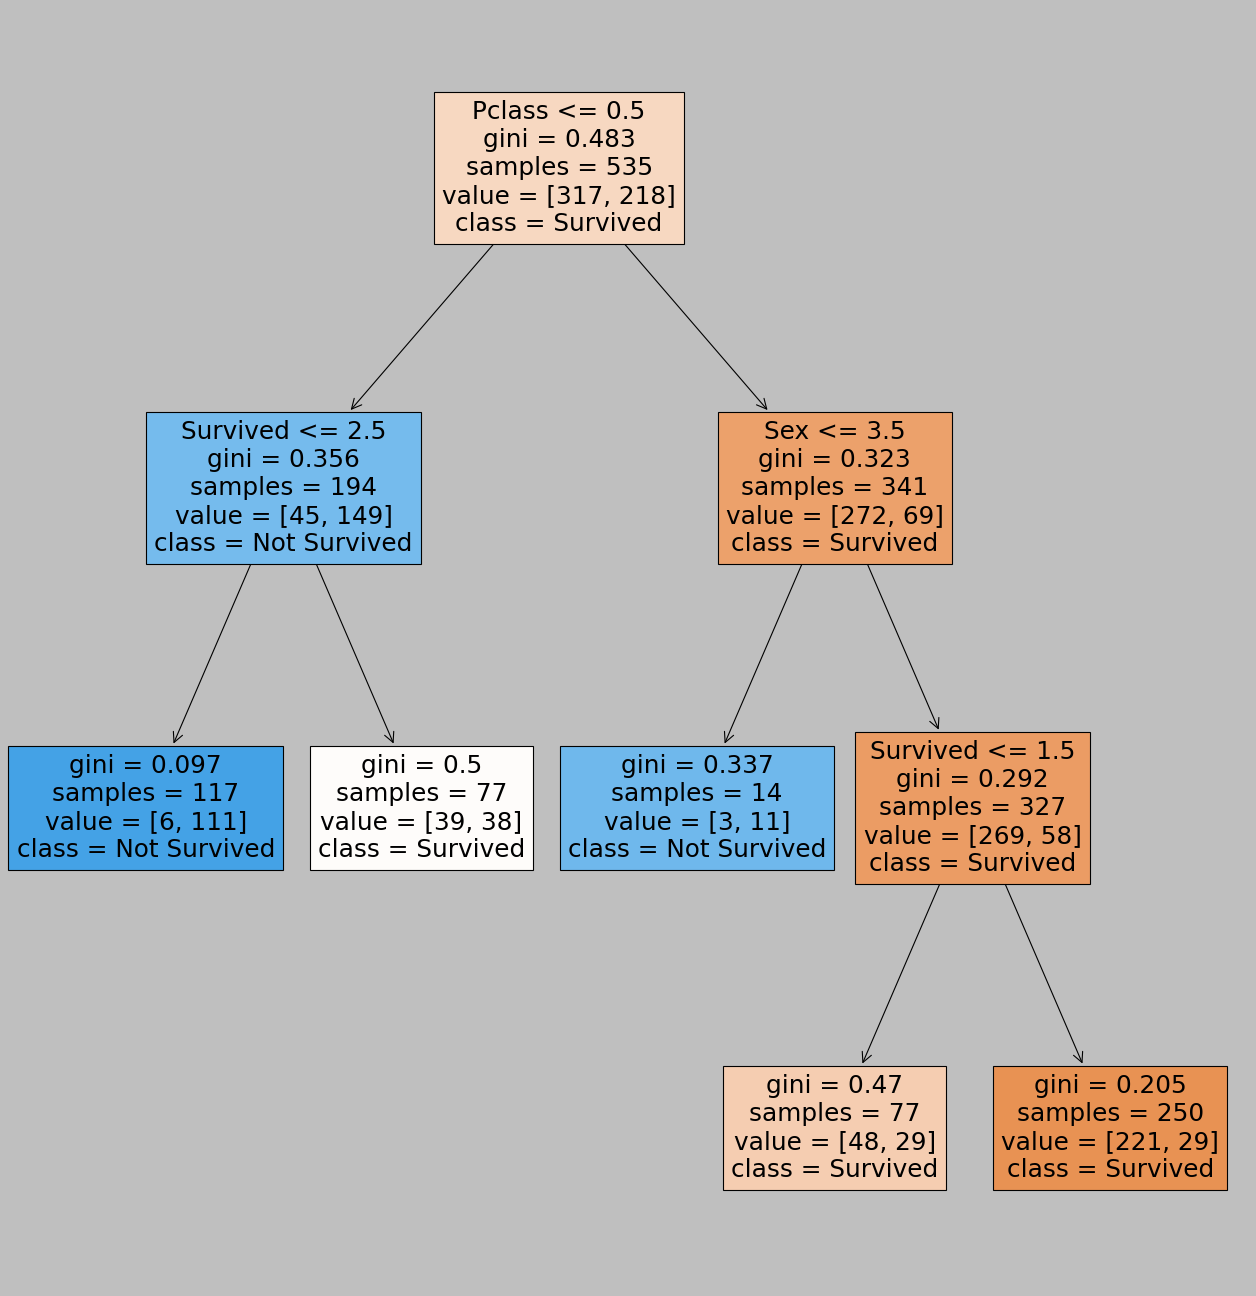

In [ ]:
_tree_=tree.DecisionTreeClassifier(random_state=0, ccp_alpha=best_test_alpha)
_tree_.fit(x_train, y_train)
y_train_prediction = _tree_.predict(x_train)
y_test_prediction=_tree_.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(_tree_,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

plt.figure(figsize=(20,20))
features=df.columns
classes=['Survived','Not Survived']
tree.plot_tree(_tree_, feature_names=features, class_names=classes, filled=True)
plt.show()



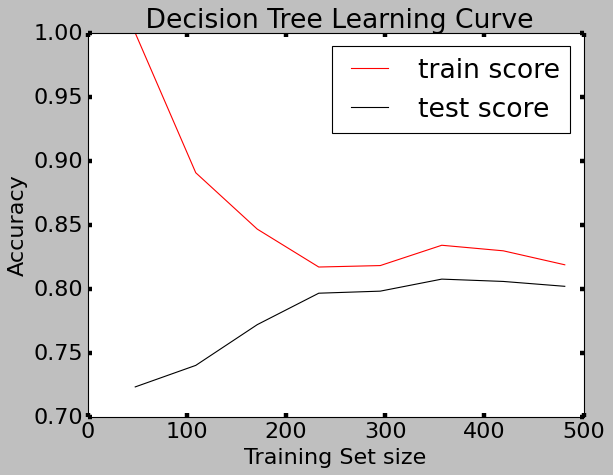

In [ ]:
train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(_tree_, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
dt_test_score_mean=np.mean(valid_score, axis=1)
dt_fit_score_mean=np.mean(fit_times, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,dt_test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

# **Neural Network**

Accuracy for Neural Network is 73.74301675977654
Confusion Matrix: [[90 17]
 [30 42]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       317
           1       0.77      0.67      0.71       218

    accuracy                           0.78       535
   macro avg       0.78      0.76      0.77       535
weighted avg       0.78      0.78      0.78       535



<Figure size 640x480 with 0 Axes>

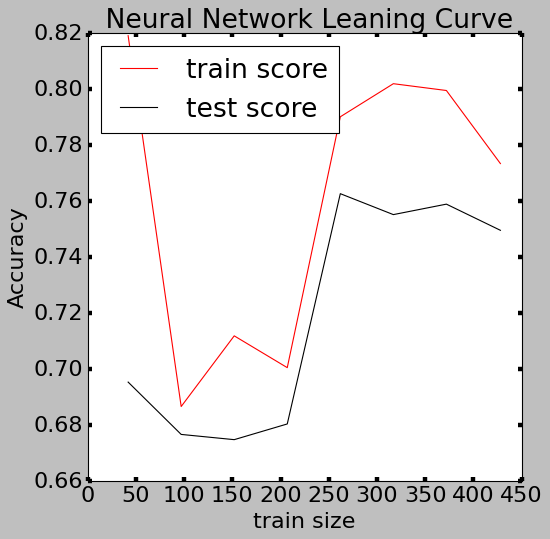

Train score 0.7831775700934579
Test score 0.7374301675977654


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross Validation Score 0.7675662365803212
std of cross validation score 0.038616493495588676


In [ ]:
NN=MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.005, validation_fraction=0.1, random_state=42)
NN.fit(x_train, y_train)
predict_train=NN.predict(x_train)
predict_test=NN.predict(x_test)
accuracy=accuracy_score(y_test, predict_test)*100
confusion_mat = confusion_matrix(y_test, predict_test)
print("Accuracy for Neural Network is", accuracy)
print("Confusion Matrix:", confusion_mat)
print(classification_report(y_train, predict_train))

train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(NN, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
plt.figure()
# train_score_mean=np.mean(train_score, axis=1)
# test_score_mean=np.mean(valid_score, axis=1)
train_score_mean=train_score.mean(axis=1)
test_score_mean=valid_score.mean(axis=1)

plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best", fontsize=24)
plt.title(" Neural Network Leaning Curve", fontsize=24)
plt.xlabel("train size", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()
print(f'Train score {accuracy_score(predict_train,y_train)}')
print(f'Test score {accuracy_score(predict_test,y_test)}')
cross_validation_score=cross_val_score(NN,X,y,cv=5).mean()
std_cv=np.std(cross_val_score(NN,X,y,cv=5))
print(f'Cross Validation Score {cross_validation_score}')
print(f'std of cross validation score {std_cv}')



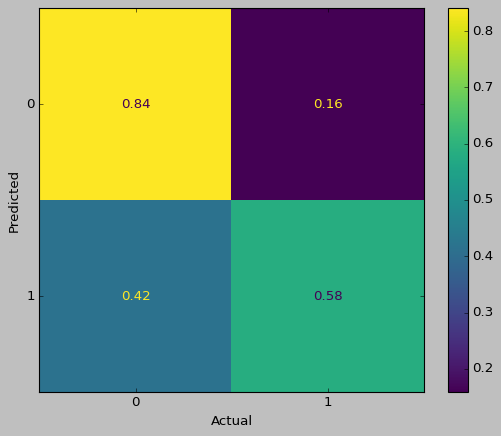

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       107
           1       0.71      0.58      0.64        72

    accuracy                           0.74       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.73      0.74      0.73       179



In [ ]:
predictions=NN.predict(x_test)
cm=confusion_matrix(y_test,predictions, labels=NN.classes_, normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NN.classes_)
disp.plot()
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show(block=False)
print(classification_report(y_test,predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

best number hidden layer 7


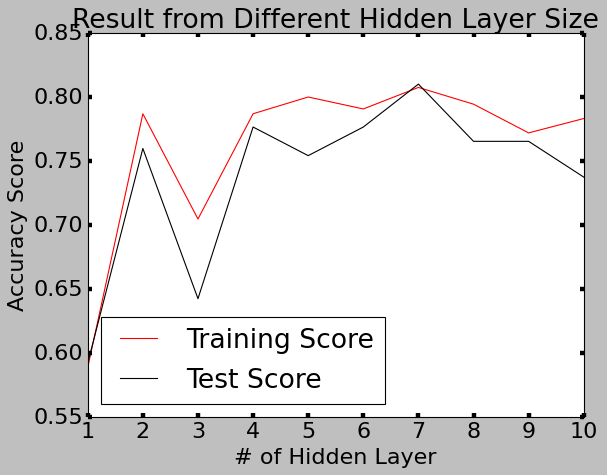

In [ ]:
# figure out the hiddel layber for best result
hsize=[1,2,3,4,5,6,7,8,9,10]
train_score=[]
test_score=[]
for i in hsize:
  NN=MLPClassifier(hidden_layer_sizes=(i,),activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.005, validation_fraction=0.1,random_state=42)
  NN.fit(x_train, y_train)
  predict_train=NN.predict(x_train)
  predict_test=NN.predict(x_test)
  accuracy_train_score=accuracy_score(y_train,predict_train)
  accuracy_test_score=accuracy_score(y_test, predict_test)
  train_score.append(accuracy_train_score)
  test_score.append(accuracy_test_score)
best_index_h=np.argmax(test_score)
best_hidden_layer=hsize[best_index_h]
print("best number hidden layer",best_hidden_layer)

plt.figure()
plt.plot(hsize, train_score, label="Training Score", color="red")
plt.plot(hsize, test_score, label="Test Score", color="black")
plt.title("Result from Different Hidden Layer Size", fontsize=24)
plt.xlabel("# of Hidden Layer",fontsize=20)
plt.ylabel("Accuracy Score",fontsize=20)
plt.legend(loc='best',fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.show()


In [ ]:
learning_rate=np.linspace(0.001,0.01,10)
hsize=[1,2,3,4,5,6,7]
param_grid={'hidden_layer_sizes':hsize,'learning_rate_init': learning_rate}
nngrid=GridSearchCV(estimator=MLPClassifier(solver='adam',random_state=42,activation='logistic', learning_rate='adaptive'),param_grid=param_grid, cv=10, n_jobs=-1)
nngrid.fit(x_train, y_train)
NNmodel=nngrid.best_estimator_
dump(NNmodel,"model.joblib")
estimator=load("model.joblib")
print("best estimator",estimator)
NNmodel.fit(x_train,y_train)
y_train_prediction=NNmodel.predict(x_train)
y_test_prediction=NNmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(NNmodel,X,y,cv=5).mean()
std_cv=np.std(cross_val_score(NNmodel,X,y,cv=5))
print(f'Cross Validation Score {cross_validation_score}')
print(f'std of cross validation score {std_cv}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


best estimator MLPClassifier(activation='logistic', hidden_layer_sizes=7,
              learning_rate='adaptive', learning_rate_init=0.01,
              random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score 0.8355140186915888
Test score 0.8156424581005587


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross Validation Score 0.806796020880528
std of cross validation score 0.03441170916108119


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

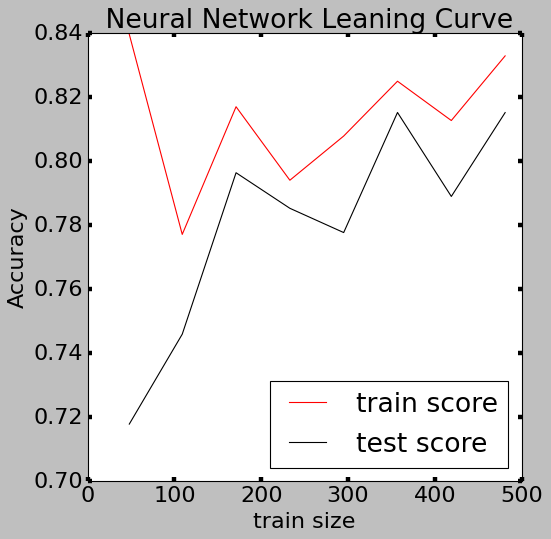

In [ ]:
train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(NNmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
plt.figure()
train_score_mean=train_score.mean(axis=1)
nn_test_score_mean=valid_score.mean(axis=1)
nn_fit_score_mean=np.mean(fit_times, axis=1)

plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, nn_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Neural Network Leaning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


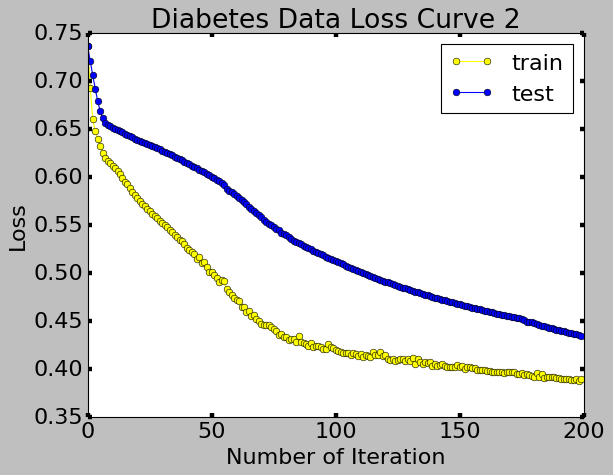

In [ ]:
plt.figure()
NNmodel.fit(x_train,y_train)
train_loss=NNmodel.loss_curve_
plt.plot(train_loss,'o-',color="yellow",label="train")
NNmodel.fit(x_test,y_test)
test_loss=NNmodel.loss_curve_
plt.plot(test_loss, 'o-',color="blue", label="test")
plt.title("Diabetes Data Loss Curve 2", fontsize=24)
plt.xlabel("Number of Iteration",fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.tick_params(labelsize=20,width=4)

# **Support Vector Machine SVM**

Accuracy Score:  0.7597765363128491
Precision Score:  0.7164179104477612
Recall Score:  0.6666666666666666


<Figure size 640x480 with 0 Axes>

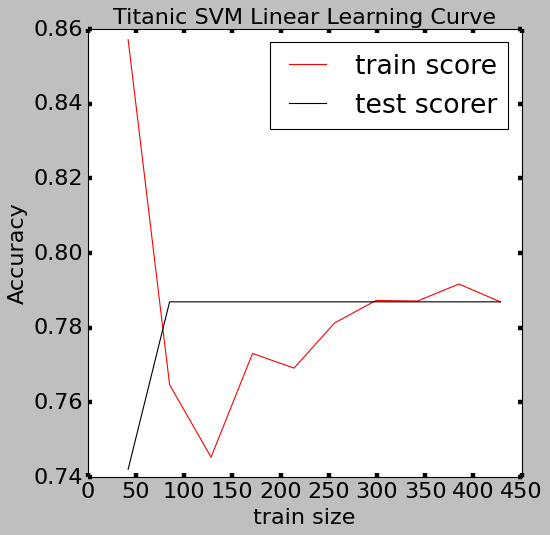

Train score 0.8355140186915888
Test score 0.8156424581005587
Cross Validation Score 0.7801339505564858


In [ ]:
#Support Vector Machine SVM
clf_linear=svm.SVC(kernel='linear',random_state=42)
clf_linear.fit(x_train, y_train)
y_prediction=clf_linear.predict(x_test)
accuracy_linear= accuracy_score (y_test,y_prediction)
precision_linear=precision_score(y_test,y_prediction)
recall_linear=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_linear)
print("Precision Score: ", precision_linear)
print("Recall Score: ", recall_linear)

train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_linear, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test scorer", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Titanic SVM Linear Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(clf_linear,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

In [ ]:
import statistics
# df.describe()
print("Variance")
print(df.var())

Variance
Survived       0.241533
Pclass         0.702663
Sex            0.232247
Age          211.019125
SibSp          0.864497
Parch          0.728103
Fare        2800.413100
dtype: float64


Accuracy Score:  0.6424581005586593
Precision Score:  0.6
Recall Score:  0.3333333333333333


<Figure size 640x480 with 0 Axes>

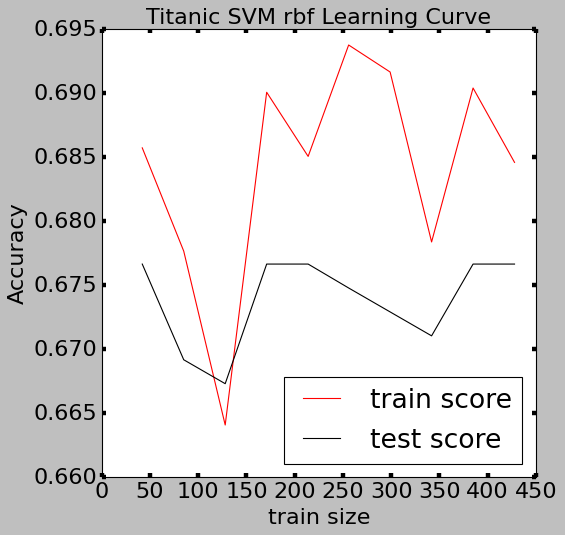

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
clf_rbf=svm.SVC(kernel='rbf', random_state=42)
clf_rbf.fit(x_train, y_train)
y_prediction=clf_rbf.predict(x_test)
accuracy_rbf= accuracy_score (y_test,y_prediction)
precision_rbf=precision_score(y_test,y_prediction)
recall_rbf=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_rbf)
print("Precision Score: ", precision_rbf)
print("Recall Score: ", recall_rbf)

train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_rbf, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Titanic SVM rbf Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


Accuracy Score:  0.6201117318435754
Precision Score:  0.75
Recall Score:  0.08333333333333333


<Figure size 640x480 with 0 Axes>

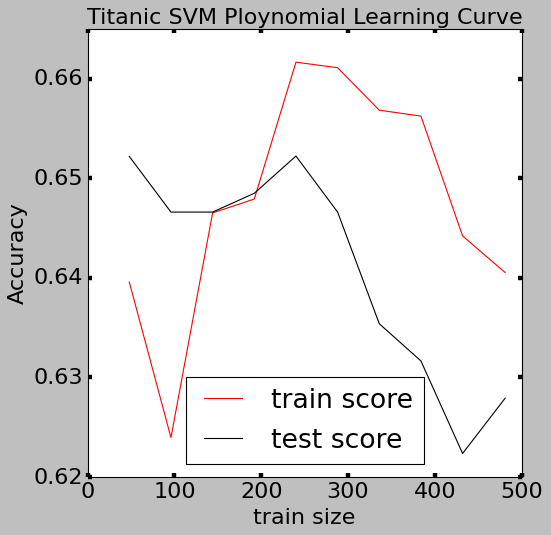

In [ ]:
clf_poly=svm.SVC(kernel='poly', random_state=42)
clf_poly.fit(x_train, y_train)
y_prediction=clf_poly.predict(x_test)
accuracy_poly= accuracy_score (y_test,y_prediction)
precision_poly=precision_score(y_test,y_prediction)
recall_poly=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_poly)
print("Precision Score: ", precision_poly)
print("Recall Score: ", recall_poly)
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_poly, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
train_std=np.std(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
test_std=np.std(valid_score, axis=1)
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Titanic SVM Ploynomial Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


Accuracy Score:  0.5977653631284916
Precision Score:  0.5
Recall Score:  0.5277777777777778


<Figure size 640x480 with 0 Axes>

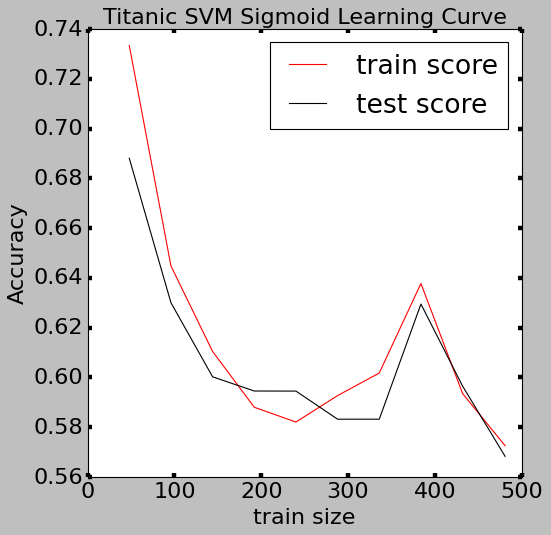

In [ ]:
clf_sigmoid=svm.SVC(kernel='sigmoid', random_state=42)
clf_sigmoid.fit(x_train, y_train)
y_prediction=clf_sigmoid.predict(x_test)
accuracy_sigmoid= accuracy_score (y_test,y_prediction)
precision_sigmoid=precision_score(y_test,y_prediction)
recall_sigmoid=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_sigmoid)
print("Precision Score: ", precision_sigmoid)
print("Recall Score: ", recall_sigmoid)
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_sigmoid, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Titanic SVM Sigmoid Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


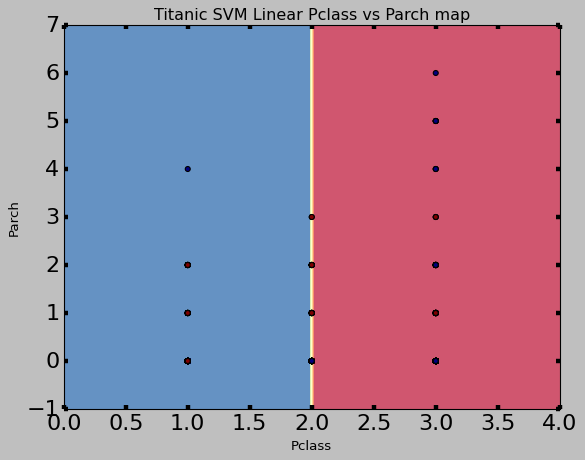

accuracy score linear 0.7206703910614525


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


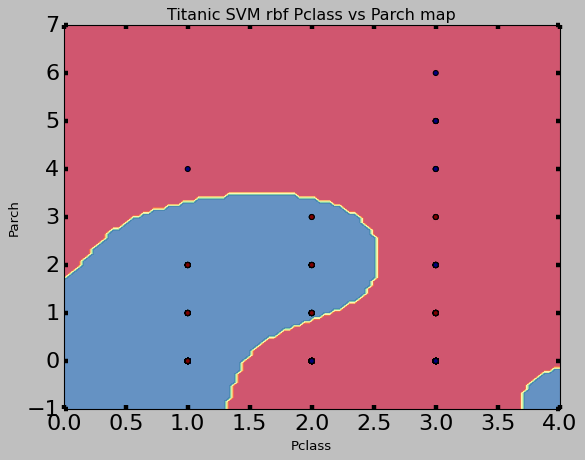

accuracy score rbf 0.7430167597765364


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


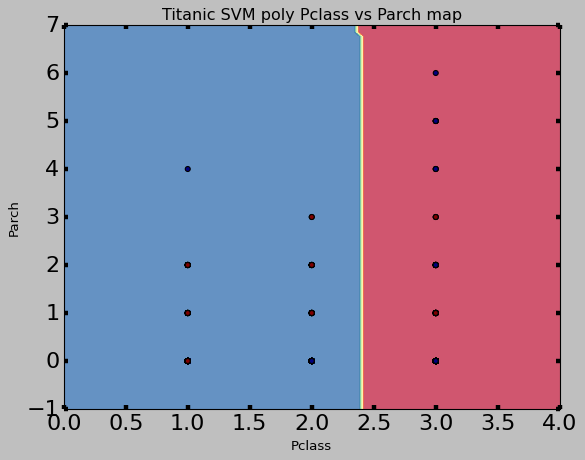

accuracy score poly 0.7318435754189944


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


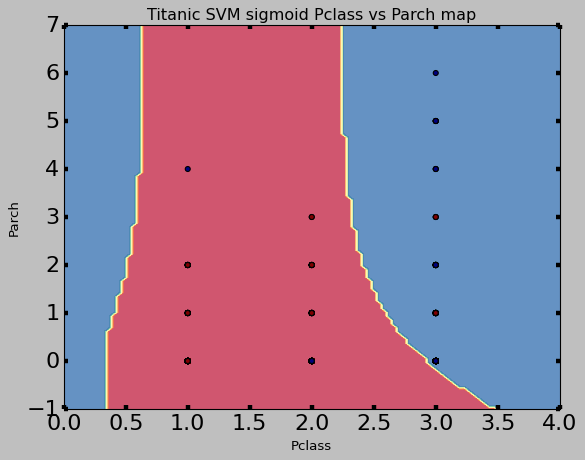

accuracy score sigmoid 0.2681564245810056


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
df=df.loc[:,('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]
X_map=df[['Pclass','Parch']]
x_train,x_test,y_train,y_test=train_test_split(X_map,y,test_size=0.25, random_state=42)

clf_linear=svm.SVC(kernel='linear')
clf_linear.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_linear,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Pclass",ylabel='Parch',fontsize=20)
plt.scatter(X_map['Pclass'],X_map['Parch'], c=y, s=20, edgecolors="k")
plt.tick_params(labelsize=20,width=4)
plt.title("Titanic SVM Linear Pclass vs Parch map")
plt.show()
y_prediction=clf_linear.predict(x_test)
accuracy_linear= accuracy_score (y_test,y_prediction)
print("accuracy score linear",accuracy_linear)

clf_rbf=svm.SVC(kernel='rbf')
clf_rbf.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_rbf,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Pclass",ylabel='Parch',fontsize=20)
plt.scatter(X_map['Pclass'],X_map['Parch'], c=y, s=20, edgecolors="k")
plt.tick_params(labelsize=20,width=4)
plt.title("Titanic SVM rbf Pclass vs Parch map")
plt.show()
y_prediction=clf_rbf.predict(x_test)
accuracy_rbf= accuracy_score (y_test,y_prediction)
print("accuracy score rbf",accuracy_rbf)

clf_poly=svm.SVC(kernel='poly')
clf_poly.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_poly,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Pclass",ylabel='Parch',fontsize=20)
plt.scatter(X_map['Pclass'],X_map['Parch'], c=y, s=20, edgecolors="k")
plt.tick_params(labelsize=20,width=4)
plt.title("Titanic SVM poly Pclass vs Parch map")
plt.show()
y_prediction=clf_poly.predict(x_test)
accuracy_poly= accuracy_score (y_test,y_prediction)
print("accuracy score poly",accuracy_poly)

clf_sigmoid=svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_sigmoid,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Pclass",ylabel='Parch',fontsize=20)
plt.scatter(X_map['Pclass'],X_map['Parch'], c=y, s=20, edgecolors="k")
plt.title("Titanic SVM sigmoid Pclass vs Parch map")
plt.tick_params(labelsize=20,width=4)
plt.show()
y_prediction=clf_sigmoid.predict(x_test)
accuracy_sigmoid= accuracy_score (y_test,y_prediction)
print("accuracy score sigmoid",accuracy_sigmoid)

In [ ]:
param_grid={'C':[0.1,1,10,100,1000],"gamma":[1,0.1,0.001,0.0001],'kernel':['linear','rnf','polynomial','signomoid']}
# param_grid={'kernel':['linear','rnf','polynomial','signomoid']}
svmgrid=GridSearchCV(svm.SVC(random_state=42),param_grid,refit=True,verbose=3, n_jobs=-1)
svmgrid.fit(x_train, y_train)
svmmodel=svmgrid.best_estimator_
dump(svmmodel,"svmmodel.joblib")
estimator=load("svmmodel.joblib")
print("best estimator",estimator)
svmmodel.fit(x_train,y_train)
y_train_prediction=svmmodel.predict(x_train)
y_test_prediction=svmmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(svmmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_par

best estimator SVC(C=0.1, gamma=1, kernel='linear', random_state=42)
Train score 0.6429906542056075
Test score 0.7318435754189944
Cross Validation Score 0.7787353491578844


<Figure size 640x480 with 0 Axes>

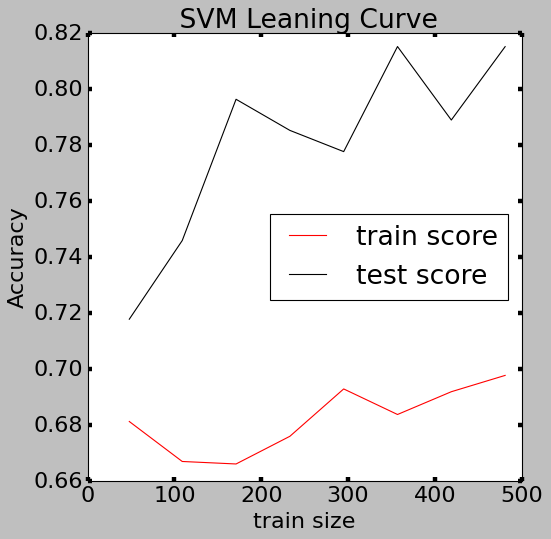

In [ ]:
train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(svmmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
plt.figure()
train_score_mean=train_score.mean(axis=1)
svm_test_score_mean=valid_score.mean(axis=1)
svm_fit_score_mean=np.mean(fit_times, axis=1)

plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, nn_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" SVM Leaning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
# source of code: https://realpython.com/knn-python/

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
train_prediction=knn.predict(x_train)
mse=mean_squared_error(y_train,train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)

test_prediction=knn.predict(x_test)
mse=mean_squared_error(y_test,test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)


rmse_train 0.7488308644489767
rmse_test 0.7695315269368246


Train score 0.42990654205607476
Test score 0.3743016759776536
Cross Validation Score 0.6793657047178174


<Figure size 640x480 with 0 Axes>

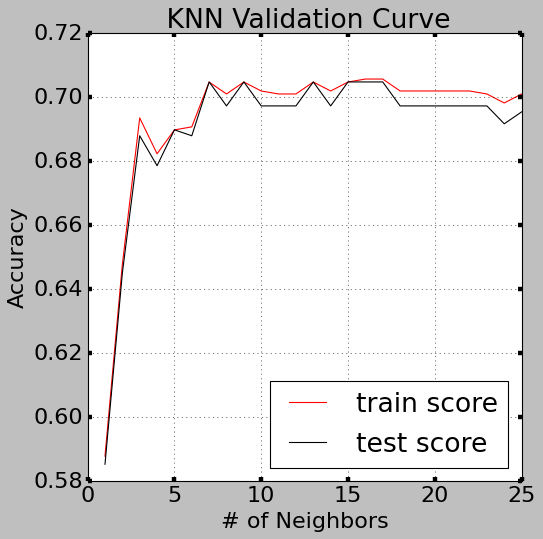

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)

y_train_prediction=knn.predict(x_train)
y_test_prediction=knn.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(knn,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
from sklearn.model_selection import KFold
kfold=KFold(n_splits=3, shuffle=True, random_state=42)
n_neighbors=np.arange(25)+1
train_score, valid_score=validation_curve(knn, x_train, y_train, param_name="n_neighbors", param_range=depth_range, cv=kfold, n_jobs=4, scoring='accuracy')
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(n_neighbors, train_score_mean, label="train score", color="red")
plt.plot(n_neighbors, test_score_mean, label="test score", color="black")
plt.legend()
plt.title(" KNN Validation Curve",fontsize=24)
plt.xlabel("# of Neighbors",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.legend(loc="best",fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.grid()
plt.show()

Train score 0.6841121495327103
Test score 0.7262569832402235
Cross Validation Score 0.6877376144981778


<Figure size 640x480 with 0 Axes>

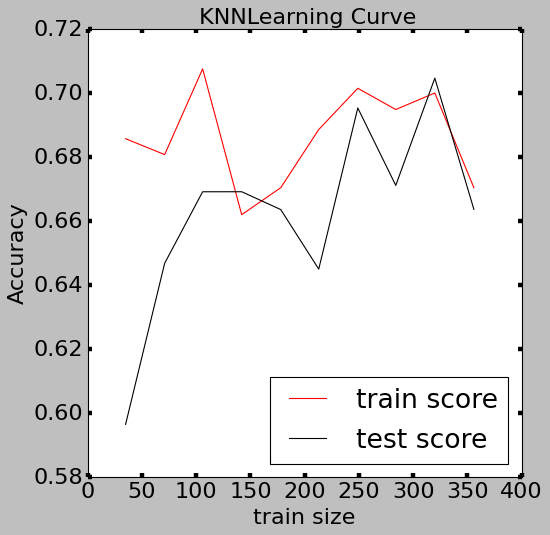

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_train_prediction=knn.predict(x_train)
y_test_prediction=knn.predict(x_test)

print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(knn,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

kfold=KFold(n_splits=3, shuffle=True, random_state=100)
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(knn, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=kfold)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best", fontsize=24)
plt.title(" KNNLearning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


In [ ]:

kfold=KFold(n_splits=3, shuffle=True, random_state=100)
parameters={"n_neighbors": range(1,50),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan']}
gridsearch=GridSearchCV(KNeighborsClassifier(),parameters, cv=kfold, scoring='accuracy', return_train_score=False, verbose=1)
gridsearch.fit(x_train, y_train)

knnmodel=gridsearch.best_estimator_
dump(knnmodel,"model.joblib")
estimator=load("model.joblib")
print("best estimator",estimator)
knnmodel.fit(x_train,y_train)
y_train_prediction=knnmodel.predict(x_train)
y_test_prediction=knnmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(knnmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
mse=mean_squared_error(y_train,y_train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)
mse=mean_squared_error(y_test,y_test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)



Fitting 3 folds for each of 294 candidates, totalling 882 fits
best estimator KNeighborsClassifier(metric='manhattan', n_neighbors=29, weights='distance')
Train score 0.7065420560747664
Test score 0.7430167597765364
Cross Validation Score 0.7185560917955284
rmse_train 0.5417175868709024
rmse_test 0.506935144001147


train size shape (8,)
 fit score shape (8,)


<Figure size 640x480 with 0 Axes>

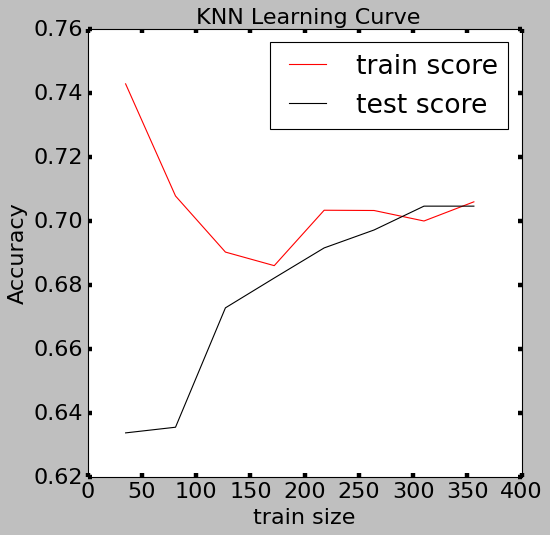

In [ ]:

kfold=KFold(n_splits=3, shuffle=True, random_state=100)
train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(knnmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=kfold)
train_score_mean=np.mean(train_score, axis=1)
knn_test_score_mean=np.mean(valid_score, axis=1)
knn_fit_score_mean=np.mean(fit_times, axis=1)

print("train size shape", np.shape(train_sizes))
print(" fit score shape", np.shape(knn_fit_score_mean))

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, knn_test_score_mean, label="test score", color="black")
plt.legend(loc="best", fontsize=24)
plt.title(" KNN Learning Curve", fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


# **Boosting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
clf=AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=50,random_state=42)
clf.fit(x_train,y_train)
y_train_prediction=clf.predict(x_train)
y_test_prediction=clf.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(clf,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')


Train score 0.7065420560747664
Test score 0.7430167597765364
Cross Validation Score 0.799783315276273


<Figure size 640x480 with 0 Axes>

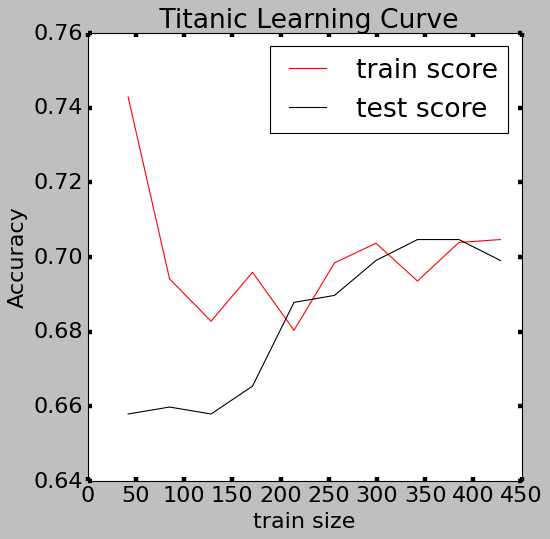

In [ ]:

# kfold=KFold(n_splits=3, shuffle=True, random_state=42)
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5,random_state=42)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Titanic Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


best number estimator 4


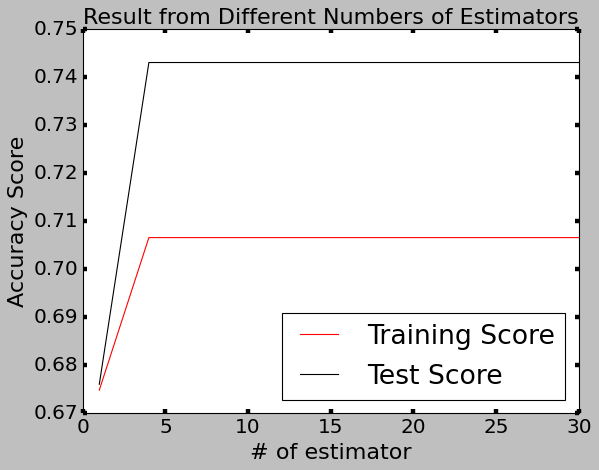

In [ ]:
n_estimators=np.linspace(1,30,10).astype('int')
train_score=[]
test_score=[]
for i in n_estimators:
  boosting=AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=i,random_state=42)
  boosting.fit(x_train, y_train)
  predict_train=boosting.predict(x_train)
  predict_test=boosting.predict(x_test)
  accuracy_train_score=accuracy_score(y_train,predict_train)
  accuracy_test_score=accuracy_score(y_test, predict_test)
  train_score.append(accuracy_train_score)
  test_score.append(accuracy_test_score)
best_index_boosting=np.argmax(test_score)
best_estimator=n_estimators[best_index_boosting]
print("best number estimator",best_estimator)

plt.figure()
plt.plot(n_estimators, train_score, label="Training Score", color="red")
plt.plot(n_estimators, test_score, label="Test Score", color="black")
plt.title("Result from Different Numbers of Estimators", fontsize=20)
plt.xlabel("# of estimator",fontsize=20)
plt.ylabel("Accuracy Score",fontsize=20)
plt.legend(loc='best',fontsize=24)
plt.tick_params(labelsize=18,width=4)
plt.show()

In [ ]:
# kfold=KFold(n_splits=3, shuffle=True, random_state=42)
parameters={"n_estimators": range(1,20), 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6],'algorithm':['SAMME','SAMME.R']}
gridsearch_boosting=GridSearchCV(AdaBoostClassifier(random_state=42), parameters, cv=5, n_jobs=-1)
gridsearch_boosting.fit(x_train, y_train)
boostingmodel=gridsearch_boosting.best_estimator_
dump(boostingmodel,"boostingmodel.joblib")
estimator=load("boostingmodel.joblib")
print("best estimator",estimator)
boostingmodel.fit(x_train,y_train)
y_train_prediction=boostingmodel.predict(x_train)
y_test_prediction=boostingmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(boostingmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
mse=mean_squared_error(y_train,y_train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)
mse=mean_squared_error(y_test,y_test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)


best estimator AdaBoostClassifier(learning_rate=1, n_estimators=11, random_state=42)
Train score 0.7065420560747664
Test score 0.7430167597765364
Cross Validation Score 0.8011819166748744
rmse_train 0.5417175868709024
rmse_test 0.506935144001147


<Figure size 640x480 with 0 Axes>

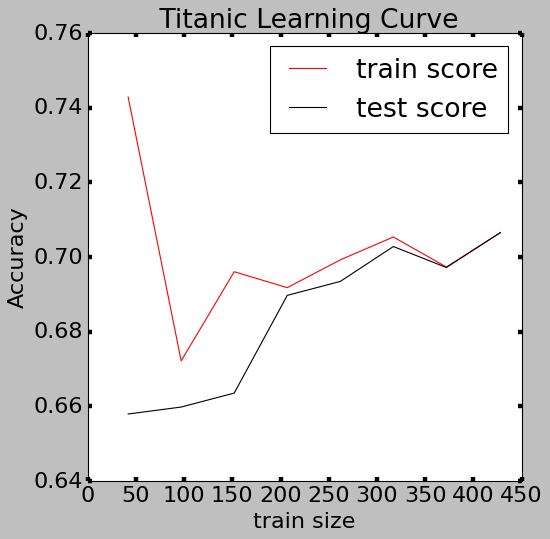

In [ ]:
# kfold=KFold(n_splits=3, shuffle=True, random_state=42)
train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(boostingmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
boosting_test_score_mean=np.mean(valid_score, axis=1)
boosting_fit_score_mean=np.mean(fit_times, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, boosting_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Titanic Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

# **Model Comparison**

<Figure size 640x480 with 0 Axes>

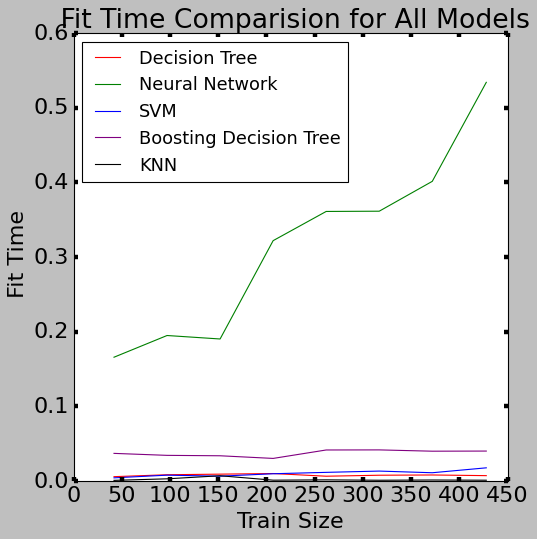

In [ ]:
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes,dt_fit_score_mean,label="Decision Tree",color="red")
plt.plot(train_sizes,nn_fit_score_mean,label="Neural Network",color="green")
plt.plot(train_sizes,svm_fit_score_mean,label="SVM",color="blue")
plt.plot(train_sizes,boosting_fit_score_mean,label="Boosting Decision Tree",color="purple")
plt.plot(train_sizes,knn_fit_score_mean,label="KNN",color="black")

plt.title(" Fit Time Comparision for All Models",fontsize=24)
plt.xlabel("Train Size",fontsize=20)
plt.ylabel(" Fit Time",fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.tick_params(labelsize=20,width=4)
plt.show()

<Figure size 640x480 with 0 Axes>

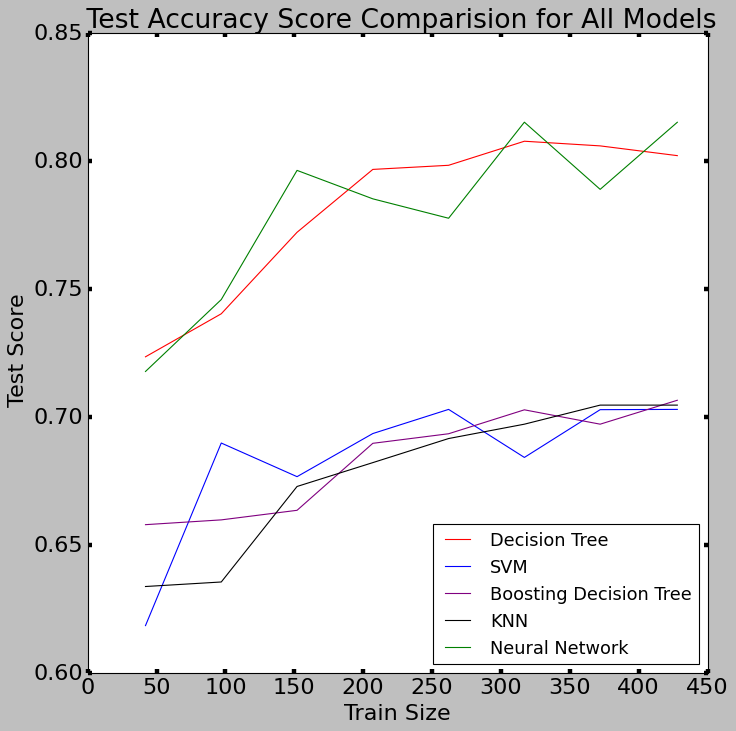

In [ ]:
plt.figure()
plt.subplots(1,figsize=(10,10))

plt.plot(train_sizes,dt_test_score_mean,label="Decision Tree",color="red")
plt.plot(train_sizes,svm_test_score_mean,label="SVM",color="blue")
plt.plot(train_sizes,boosting_test_score_mean,label="Boosting Decision Tree",color="purple")
plt.plot(train_sizes,knn_test_score_mean,label="KNN",color="black")
plt.plot(train_sizes,nn_test_score_mean,label="Neural Network",color="green")

plt.title(" Test Accuracy Score Comparision for All Models",fontsize=24)
plt.xlabel("Train Size",fontsize=20)
plt.ylabel(" Test Score",fontsize=20)
# plt.ylim(0.56,0.82)
plt.legend(loc="best", fontsize=16)
plt.tick_params(labelsize=20,width=4)
plt.show()